# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import uniform, randint
import string

# Data Collection

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Data Understanding

### Analyzing train data

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Analyzing test data

In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


#### Short conclusion about Data Understanding:
There are three features in the training and test datasets that contain null values. The common feature is 'Age' and 'Cabin.'

Analyzing the 'mean' and 'std' of the 'Age' and 'Fare' features from both datasets, the relationship between the 'std' and 'mean' of each feature in their respective datasets is similar, with a difference of approximately 15 points for the 'Age' feature and 20 points for the 'Fare' feature.

# Data Wrangling

#### Filling null values in 2 features in differents datasets which one feature contained 1 null value and other one 2 values.

In [13]:
# Filled 2 null values in df_train['Embarked'] with mode of its column
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [14]:
# Filled 1 null value in df_test['Fare'] with median of its column
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

## Feature Engineering

### 'SibSp' and 'Parch'

In [15]:
# This feature is created to summarize the size of the family in the ship, if a person is traveling alone, then its number is 1.
# Created a new feature in each dataset called 'Fsize' which consist the sum of ('SibSp' + 'Parch' + 1)

df_train["Fsize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["Fsize"] = df_test["SibSp"] + df_test["Parch"] + 1

In [16]:
# Feature 'Fsize' in both datasets was encoded into 4 new columns, named 'Single','SmallF','MedF', and 'LargeF'.

# df_train
df_train['Single'] = df_train['Fsize'].map(lambda s: 1 if s == 1 else 0)
df_train['SmallF'] = df_train['Fsize'].map(lambda s: 1 if  2 <= s <= 4  else 0)
df_train['MedF'] = df_train['Fsize'].map(lambda s: 1 if 5 <= s <= 6 else 0)
df_train['LargeF'] = df_train['Fsize'].map(lambda s: 1 if s >= 7 else 0)

# df_test
df_test['Single'] = df_test['Fsize'].map(lambda s: 1 if s == 1 else 0)
df_test['SmallF'] = df_test['Fsize'].map(lambda s: 1 if  2 <= s <= 4  else 0)
df_test['MedF'] = df_test['Fsize'].map(lambda s: 1 if 5 <= s <= 6 else 0)
df_test['LargeF'] = df_test['Fsize'].map(lambda s: 1 if s >= 7 else 0)

### 'Ticket'

In [17]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [18]:
# Since there are repetitions in the values of the 'Ticket' column in both datasets,
# a new feature named 'Ticket_Count'will be created.

df_train['Ticket_Count'] = df_train.groupby('Ticket')['Ticket'].transform('count')
df_test['Ticket_Count'] = df_test.groupby('Ticket')['Ticket'].transform('count')

### 'Name'

In [19]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

First, titles were extracted from passengers and a feature named 'Title' was created. These titles were grouped into 4 new columns that represent their similar characteristics.

The new feature names are ('Rare', 'Miss/Mrs/Ms', 'Mr', 'Master').
Also, a feature 'Is_Married' was created to store the information for women with 'Mrs' in their name, before 'Mrs' is transformed to 'Miss/Mrs/Ms'.


In [20]:
dataset_title_train = [i.split(",")[1].split(".")[0].strip() for i in df_train["Name"]]
df_train["Title"] = pd.Series(dataset_title_train)


dataset_title_test = [i.split(",")[1].split(".")[0].strip() for i in df_test["Name"]]
df_test["Title"] = pd.Series(dataset_title_test)


df_train['Is_Married'] = 0

df_train.loc[df_train['Title'] == 'Mrs', 'Is_Married'] = 1

df_test['Is_Married'] = 0

df_test.loc[df_test['Title'] == 'Mrs', 'Is_Married'] = 1

def replace_titles(x):
    title = x['Title']
    if title in ['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev']:
        return 'Rare'
    elif title in ['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona']:
        return 'Miss/Mrs/Ms'
    elif title in ['Mr']:
        return 'Mr'
    elif title in ['Master']:
        return 'Master'
    else:
        return title


df_train['Title'] = df_train.apply(replace_titles, axis=1)


df_test['Title'] = df_test.apply(replace_titles, axis=1)


#### This feature will also be One-Hot Encoded.

### 'Cabin'

The information about Cabin is quite limited, as most of this data is null in both datasets.
However, there is some information that might be interesting to use, as the location of each Cabin could affect the chance of a passenger surviving due to proximity characteristics related to survival rates based on 'Pclass' values (the mean was calculated only in the 'df_train' because the feature 'Survival' does not exist in 'df_test').

Based on this, Cabins 'A', 'B', and 'C' were grouped into 'ABC', Cabins 'D' and 'E' into 'DE', and Cabins 'F' and 'G' into 'FG'.
All null values were then filled with Cabin 'M'.

In [21]:
df_train['Cabin'] = df_train['Cabin'].fillna('M')
df_test['Cabin'] = df_test['Cabin'].fillna('M')

# To show before grouping into new features
df_train['Cabin_before_grouping'] = df_train ['Cabin']

In [22]:
# A unique value of 'Cabin' 'T' is changed to 'A', based on 'Pclass' attribute.
df_train.loc[df_train['Cabin'] == 'T', 'Cabin'] = 'A'


def replace_prefix(cabin):
    if pd.isna(cabin):
        return cabin
    if cabin.startswith(('A', 'B', 'C')):
        return 'ABC'
    elif cabin.startswith(('D', 'E')):
        return 'DE'
    elif cabin.startswith(('F', 'G')):
        return 'FG'
    return cabin

df_train['Cabin'] = df_train['Cabin'].apply(replace_prefix)
df_test['Cabin'] = df_test['Cabin'].apply(replace_prefix)
df_train['Cabin_after_grouping'] = df_train ['Cabin']

In [23]:
# To Exploratory Data Analysis 
df_train['Pclass_before_onehotencoding'] = df_train['Pclass']

### 'Age'

Regarding the 'Age' feature, both datasets (df_train and df_test) contain a significant number of null values (177 and 86, respectively). To avoid discarding all these rows with null values, two different imputation methods were tried:
1. Method 1: Grouping by 'Sex' and 'Pclass' and using the median age from each group to fill in the null values.
2. Method 2: Grouping by each type of one-hot encoded 'Title' feature ('Title_Rare', 'Title_Master', 'Title_Miss/Mrs/Ms', 'Title_Mr') and using the median age from each group to fill in the null values.

After applying each method, it was observed that the standard deviation of the 'Age' feature was lower with Method 1. This was the reason for choosing this method. Additionally, in machine learning development, both methods produced similar results, but Method 1 gave slightly better results.

##### The method chosed for this project is the first one.

After filling the null values, the feature 'Age' in both datasets was divided into 10 quantile-based bins using the 'qcut' function, so that each bin contains approximately the same number of observations.

In [24]:
# 1° method
grouped_train = df_train.groupby(['Sex', 'Pclass'])['Age'].transform('median')
df_train['Age'] = df_train['Age'].fillna(grouped_train)

grouped_test = df_test.groupby(['Sex', 'Pclass'])['Age'].transform('median')
df_test['Age'] = df_test['Age'].fillna(grouped_test)

In [ ]:
# 2° method
#mean_ages_train = df_train.groupby(['Title_Rare','Title_Master','Title_Miss/Mrs/Ms','Title_Mr'])['Age'].mean().reset_index()
#mean_ages_train.rename(columns={'Age': 'Mean_Age'}, inplace=True)

#mean_ages_test = df_test.groupby(['Title_Rare','Title_Master','Title_Miss/Mrs/Ms','Title_Mr'])['Age'].mean().reset_index()
#mean_ages_test.rename(columns={'Age': 'Mean_Age'}, inplace=True)

#df_train = df_train.merge(mean_ages_train, on=['Title_Rare','Title_Master','Title_Miss/Mrs/Ms','Title_Mr'], how='left')
#df_test = df_test.merge(mean_ages_test, on=['Title_Rare','Title_Master','Title_Miss/Mrs/Ms','Title_Mr'], how='left')

#df_train['Age'] = df_train['Age'].fillna(df_train['Mean_Age'])
#df_test['Age'] = df_test['Age'].fillna(df_test['Mean_Age'])

In [25]:
# Qcut bins
df_train['Age'] = pd.qcut(df_train['Age'], 10, duplicates='drop')
df_test['Age'] = pd.qcut(df_test['Age'], 10, duplicates='drop')


# Encoding age bins to improve performance in machine learning applications
df_train['Age'] = df_train['Age'].astype(str)
df_test['Age'] = df_test['Age'].astype(str)

df_train['Age_encoded'], age_uniques = pd.factorize(df_train['Age'])
df_test['Age_encoded'] = pd.factorize(df_test['Age'], sort=True)[0]

### 'Fare'

In [26]:
# Qcut bins

df_train['Fare'] = pd.qcut(df_train['Fare'], 13)
df_test['Fare'] = pd.qcut(df_test['Fare'], 13)

# Encoding fare bins to improve performance in machine learning applications
df_train['Fare_encoded'], fare_uniques = pd.factorize(df_train['Fare'])
df_test['Fare_encoded'] = pd.factorize(df_test['Fare'], sort=True)[0]

### One-Hot Encoding

'Pclass', 'Title', 'Sex', 'Embarked', and 'Cabin' features have been One-Hot Encoded to improve performance in machine learning applications.

In [27]:
def encode_columns(df_train, df_test, columns_to_encode):
    
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    for column in columns_to_encode:
        
        encoder.fit(df_train[[column]])
        encoded_train = encoder.transform(df_train[[column]])
        encoded_test = encoder.transform(df_test[[column]])
        
        encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out([column]))
        encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out([column]))
        
        df_train = df_train.drop(column, axis=1).join(encoded_train_df)
        df_test = df_test.drop(column, axis=1).join(encoded_test_df)
    
    return df_train, df_test

columns_to_encode = ['Pclass', 'Title', 'Sex', 'Embarked', 'Cabin']

df_train, df_test = encode_columns(df_train, df_test, columns_to_encode)

### 'Survival_Rate'

This feature, which is based on passengers' surnames, ticket numbers, and the target feature 'Survived' itself, helped the model achieve better accuracy results. However, since it relies on the target feature data, which is only available in the 'df_train' dataset, creating the 'Survival_Rate' feature for the 'df_test' dataset involves making assumptions based on the median. Additionally, due to the strong correlation between this feature and the target variable, some noise is added to 'df_train' to avoid potential overfitting.

Even though the original training dataset is split into training and test data to validate with this new feature or validated by cross-validation folds, the model may show high accuracy (likely due to overfitting). When submitted to the ground truth of 'df_test' from Kaggle, the accuracy may decrease. This is likely because the distribution of the ground truth from Kaggle ('y_test') may differ from that of 'y_train' and 'df_train'.

In [28]:
def extract_surname(data):
    families = []
    for name in data:
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
        family = name_no_bracket.split(',')[0]
        for c in string.punctuation:
            family = family.replace(c, '').strip()
        families.append(family)
    return families

df_train['Family'] = extract_surname(df_train['Name'])
df_test['Family'] = extract_surname(df_test['Name'])


df_family_survival_rate = df_train.groupby('Family')['Survived'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived'].median()

mean_survival_rate = np.mean(df_train['Survived'])

def fill_survival_rates(df, column, rates_dict):
    survival_rate = []
    survival_rate_NA = []
    for value in df[column]:
        if value in rates_dict:
            survival_rate.append(rates_dict[value])
        else:
            survival_rate.append(mean_survival_rate)
    return survival_rate

df_train['Family_Survival_Rate'] = fill_survival_rates(df_train, 'Family', df_family_survival_rate.to_dict())
df_test['Family_Survival_Rate'] = fill_survival_rates(df_test, 'Family', df_family_survival_rate.to_dict())

df_train['Ticket_Survival_Rate'] = fill_survival_rates(df_train, 'Ticket', df_ticket_survival_rate.to_dict())
df_test['Ticket_Survival_Rate'] = fill_survival_rates(df_test, 'Ticket', df_ticket_survival_rate.to_dict())

for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2

# Exploratory Data Analysis


### Features: 'Single', 'SmallF', 'MedF', 'LargeF'
#### In each dataset, a bar graph is plotted using Matplotlib to represent the total for each column.

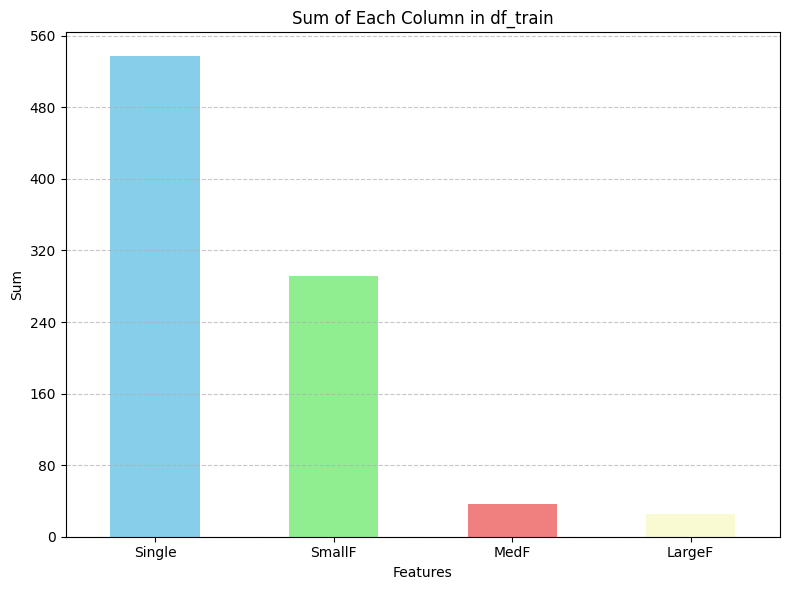

In [29]:
plt.figure(figsize=(8, 6))

df_train[['Single', 'SmallF', 'MedF', 'LargeF']].sum().plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral',
                                                                               'lightgoldenrodyellow'])
plt.title('Sum of Each Column in df_train')
plt.xlabel('Features')
plt.ylabel('Sum')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca() 
max_ticks = 8 
ax.yaxis.set_major_locator(MaxNLocator(nbins=max_ticks, integer=True))


plt.tight_layout()
plt.show()

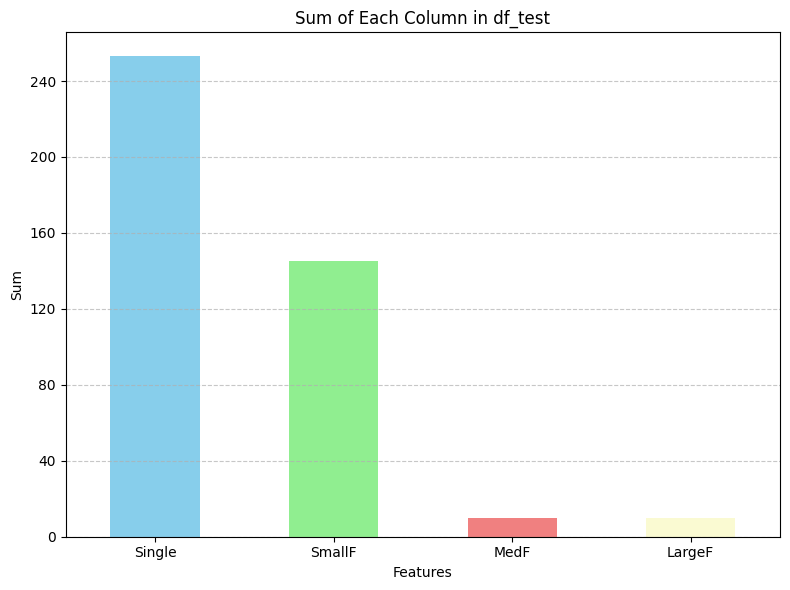

In [30]:
plt.figure(figsize=(8, 6))

df_test[['Single', 'SmallF', 'MedF', 'LargeF']].sum().plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral',
                                                                               'lightgoldenrodyellow'])
plt.title('Sum of Each Column in df_test')
plt.xlabel('Features')
plt.ylabel('Sum')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca() 
max_ticks = 8 
ax.yaxis.set_major_locator(MaxNLocator(nbins=max_ticks, integer=True))


plt.tight_layout()
plt.show()

### Feature: 'Ticket'
#### In each dataset, a bar graph is plotted using Matplotlib to represent the Number of Tickets by Number of Passengers.

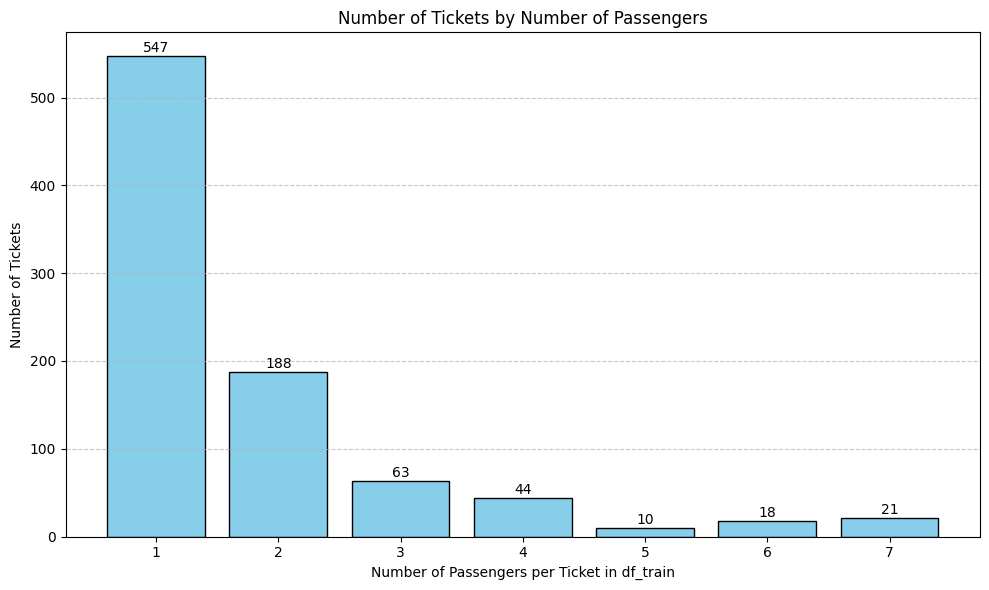

In [31]:
ticket_counts = df_train['Ticket_Count'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

bars = plt.bar(ticket_counts.index, ticket_counts.values, color='skyblue', edgecolor='black')

plt.title('Number of Tickets by Number of Passengers')
plt.xlabel('Number of Passengers per Ticket in df_train')
plt.ylabel('Number of Tickets')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 1,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

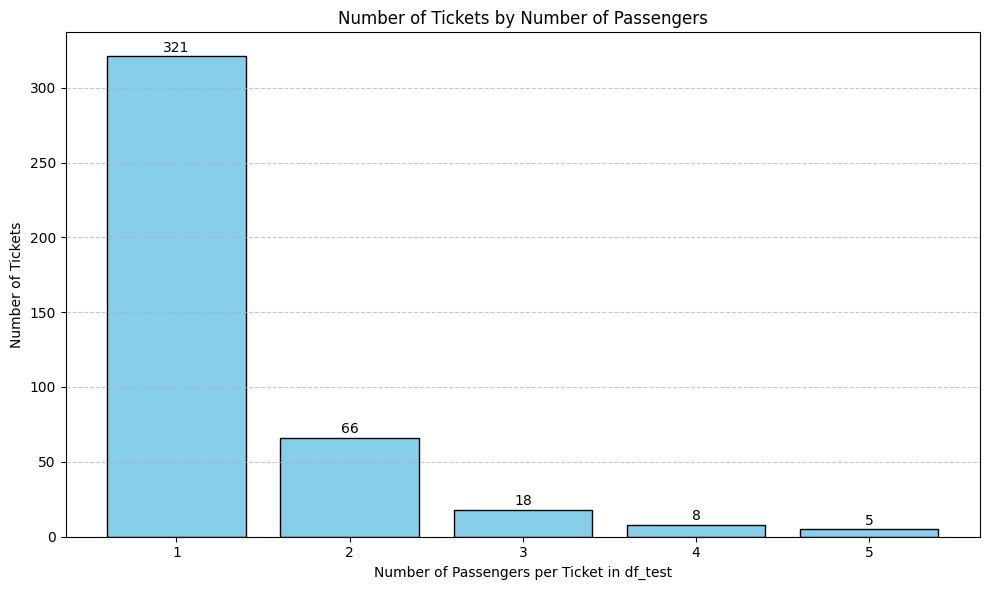

In [32]:
ticket_counts = df_test['Ticket_Count'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

bars = plt.bar(ticket_counts.index, ticket_counts.values, color='skyblue', edgecolor='black')

plt.title('Number of Tickets by Number of Passengers')
plt.xlabel('Number of Passengers per Ticket in df_test')
plt.ylabel('Number of Tickets')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 1,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Features: 'Title_Rare', 'Title_Master', 'Title_Miss/Mrs/Ms', 'Title_Mr'
#### In each dataset, a bar graph is plotted using Matplotlib to represent the total of each column.

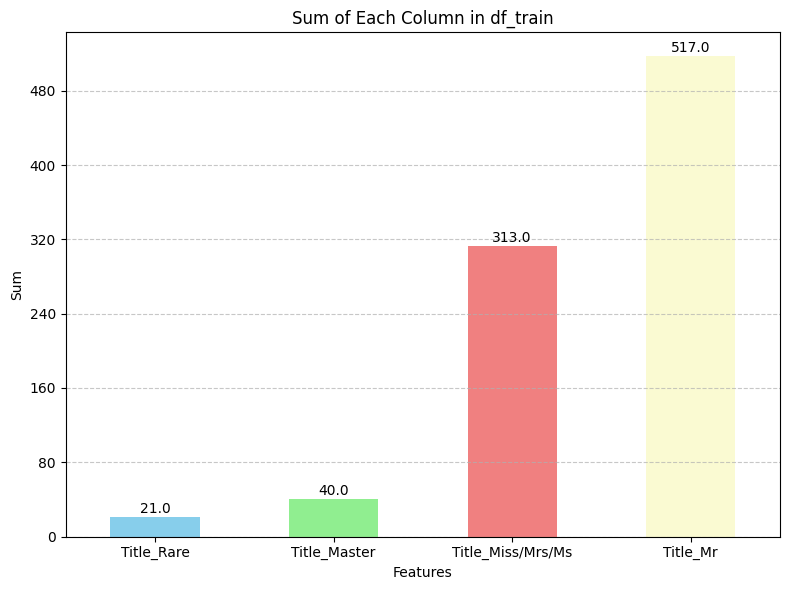

In [33]:
plt.figure(figsize=(8, 6))
bars = df_train[['Title_Rare', 'Title_Master', 'Title_Miss/Mrs/Ms', 'Title_Mr']].sum().plot(
    kind='bar', 
    color=['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow']
)

plt.title('Sum of Each Column in df_train')
plt.xlabel('Features')
plt.ylabel('Sum')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
max_ticks = 8
ax.yaxis.set_major_locator(MaxNLocator(nbins=max_ticks, integer=True))

for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 1,  
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

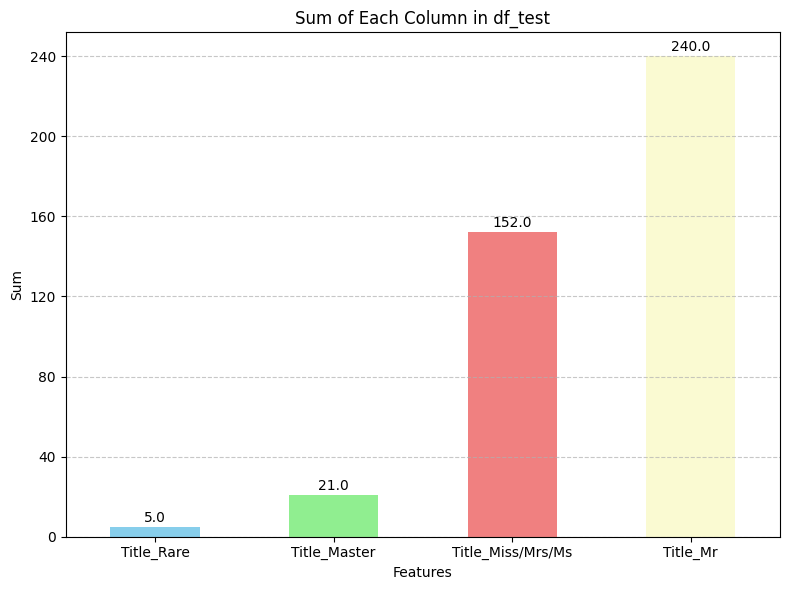

In [34]:
plt.figure(figsize=(8, 6))
bars = df_test[['Title_Rare', 'Title_Master', 'Title_Miss/Mrs/Ms', 'Title_Mr']].sum().plot(
    kind='bar', 
    color=['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow']
)

plt.title('Sum of Each Column in df_test')
plt.xlabel('Features')
plt.ylabel('Sum')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
max_ticks = 8
ax.yaxis.set_major_locator(MaxNLocator(nbins=max_ticks, integer=True))

for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 1,  
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

### Features: 'Cabin', 'Cabin_ABC','Cabin_DE', 'Cabin_FG', 'Cabin_M'
#### In the train dataset, a bar graph is plotted using Matplotlib to represent the total of each column and its percentage.

In [35]:
# Analysis of feature 'Cabin' and each value of the feature 'Pclass'
def calculate_survival_means_by_cabin_letter(df, letter_list):
    results = {}
    
    for letter in letter_list:
        filtered_df = df[df['Cabin_before_grouping'].notna() & df['Cabin_before_grouping'].str.startswith(letter)]
        
        if not filtered_df.empty:
            result = filtered_df.groupby('Pclass_before_onehotencoding')['Survived'].mean()
            results[letter] = result
    
    return results

list_cabin = ['A','B','C','D','E','F','G','M']

results = calculate_survival_means_by_cabin_letter(df_train, list_cabin)

for letter, mean_survival in results.items():
    print(f"Mean survival rates for cabins starting with '{letter}'in df_train :")
    print(mean_survival)
    print()

Mean survival rates for cabins starting with 'A'in df_train :
Pclass_before_onehotencoding
1    0.466667
Name: Survived, dtype: float64

Mean survival rates for cabins starting with 'B'in df_train :
Pclass_before_onehotencoding
1    0.744681
Name: Survived, dtype: float64

Mean survival rates for cabins starting with 'C'in df_train :
Pclass_before_onehotencoding
1    0.59322
Name: Survived, dtype: float64

Mean survival rates for cabins starting with 'D'in df_train :
Pclass_before_onehotencoding
1    0.758621
2    0.750000
Name: Survived, dtype: float64

Mean survival rates for cabins starting with 'E'in df_train :
Pclass_before_onehotencoding
1    0.72
2    0.75
3    1.00
Name: Survived, dtype: float64

Mean survival rates for cabins starting with 'F'in df_train :
Pclass_before_onehotencoding
2    0.875
3    0.200
Name: Survived, dtype: float64

Mean survival rates for cabins starting with 'G'in df_train :
Pclass_before_onehotencoding
3    0.5
Name: Survived, dtype: float64

Mean surv

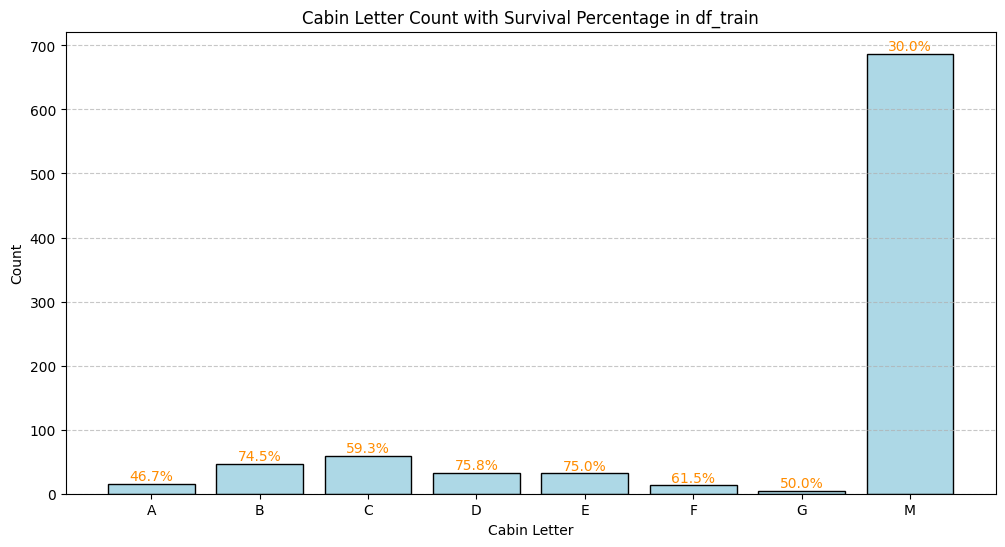

In [36]:
list_cabin = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M']

results_list = []

for letter in list_cabin:
    
    filtered_df = df_train[df_train['Cabin_before_grouping'].str.startswith(letter)]
    
    total_count = filtered_df.shape[0]
    
    survived_count = filtered_df['Survived'].sum()
    
    survived_percentage = (survived_count / total_count * 100) if total_count > 0 else 0
    
    temp_df = pd.DataFrame({
        'Letter': [letter],
        'Count': [total_count],
        'Survived_Percentage': [survived_percentage]
    })
    results_list.append(temp_df)

results_df = pd.concat(results_list, ignore_index=True)

plt.figure(figsize=(12, 6))

bars = plt.bar(results_df['Letter'], results_df['Count'], color='lightblue', edgecolor='black')

for bar, percentage in zip(bars, results_df['Survived_Percentage']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.5,
        f'{percentage:.1f}%',
        ha='center',
        va='bottom',
        color='darkorange'
    )

plt.title('Cabin Letter Count with Survival Percentage in df_train')
plt.xlabel('Cabin Letter')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

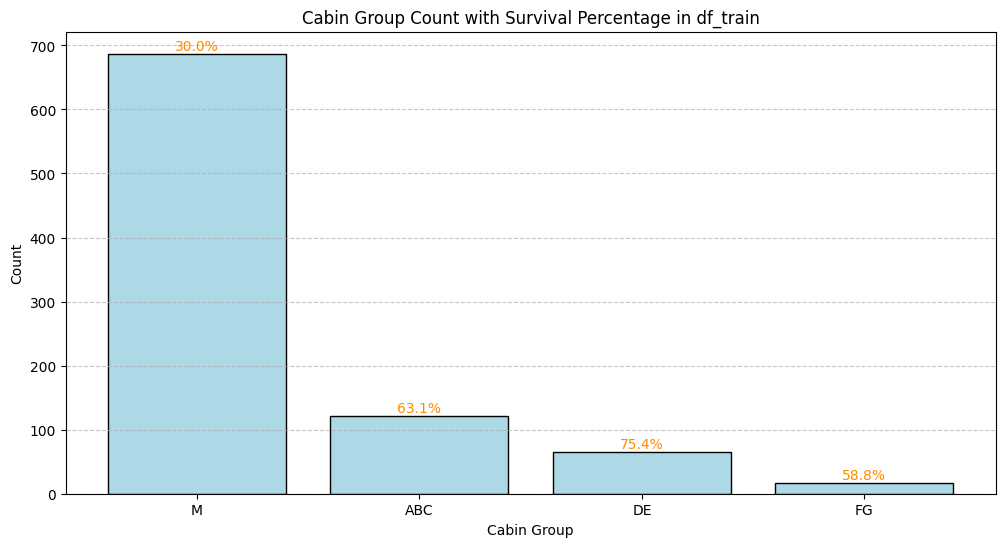

In [37]:
count_per_group = df_train['Cabin_after_grouping'].value_counts()
survived_per_group = df_train[df_train['Survived'] == 1]['Cabin_after_grouping'].value_counts()

survived_percentage = (survived_per_group / count_per_group * 100).fillna(0)

results_df_grouped = pd.DataFrame({
    'Group': count_per_group.index,
    'Count': count_per_group.values,
    'Survived_Percentage': survived_percentage.values
})

plt.figure(figsize=(12, 6))

bars = plt.bar(results_df_grouped['Group'], results_df_grouped['Count'], color='lightblue', edgecolor='black')

for bar, percentage in zip(bars, results_df_grouped['Survived_Percentage']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,  
        height + 0.5,  
        f'{percentage:.1f}%',  
        ha='center',  
        va='bottom',  
        color='darkorange'
    )

plt.title('Cabin Group Count with Survival Percentage in df_train')
plt.xlabel('Cabin Group')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Feature: 'Age'
#### For each dataset, a bar graph is plotted using Matplotlib to represent the count of each value in the 'Age' feature.

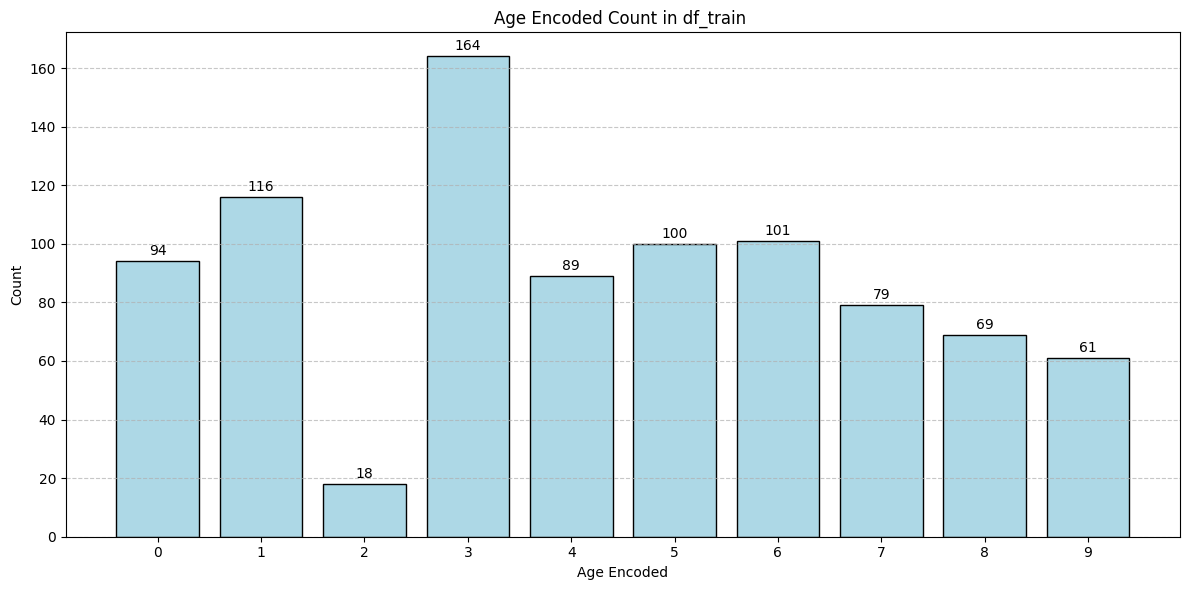

In [38]:
age_encoded = df_train['Age_encoded'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

bars = plt.bar(age_encoded.index, age_encoded.values, color='lightblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 1,
        f'{height}',
        ha='center',
        va='bottom'
    )


plt.title('Age Encoded Count in df_train ')
plt.xlabel('Age Encoded')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(age_encoded.index)

plt.tight_layout()
plt.show()

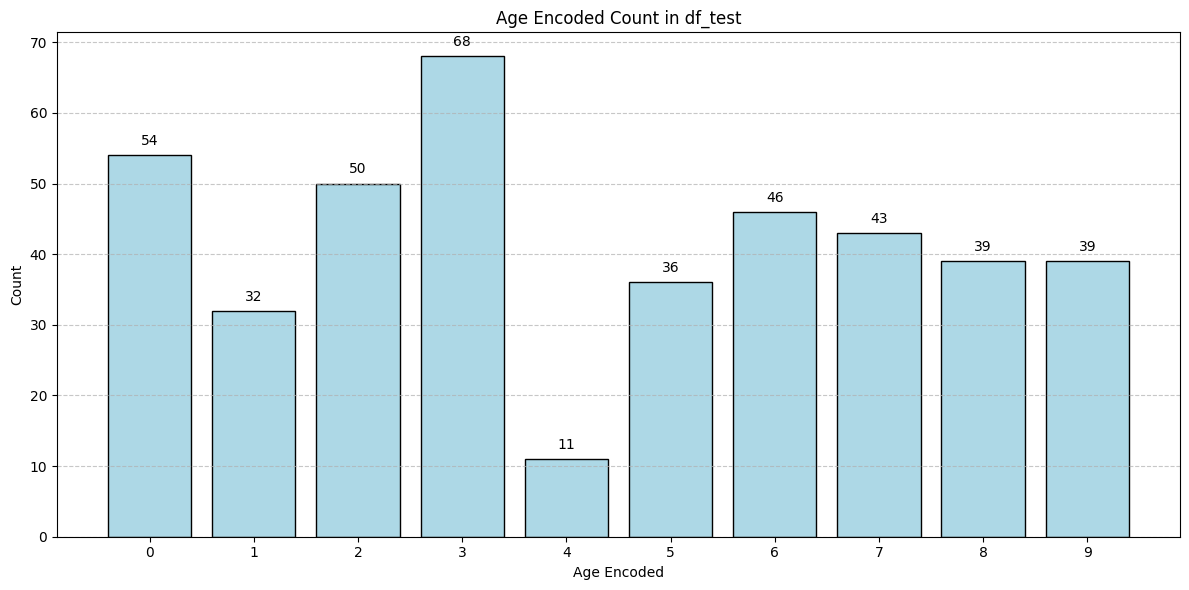

In [39]:
age_encoded = df_test['Age_encoded'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

bars = plt.bar(age_encoded.index, age_encoded.values, color='lightblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 1,
        f'{height}',
        ha='center',
        va='bottom'
    )


plt.title('Age Encoded Count in df_test')
plt.xlabel('Age Encoded')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(age_encoded.index)

plt.tight_layout()
plt.show()

### Feature: 'Fare'
#### For each dataset, a bar graph is plotted using Matplotlib to represent the count of each value in the 'Fare' feature.

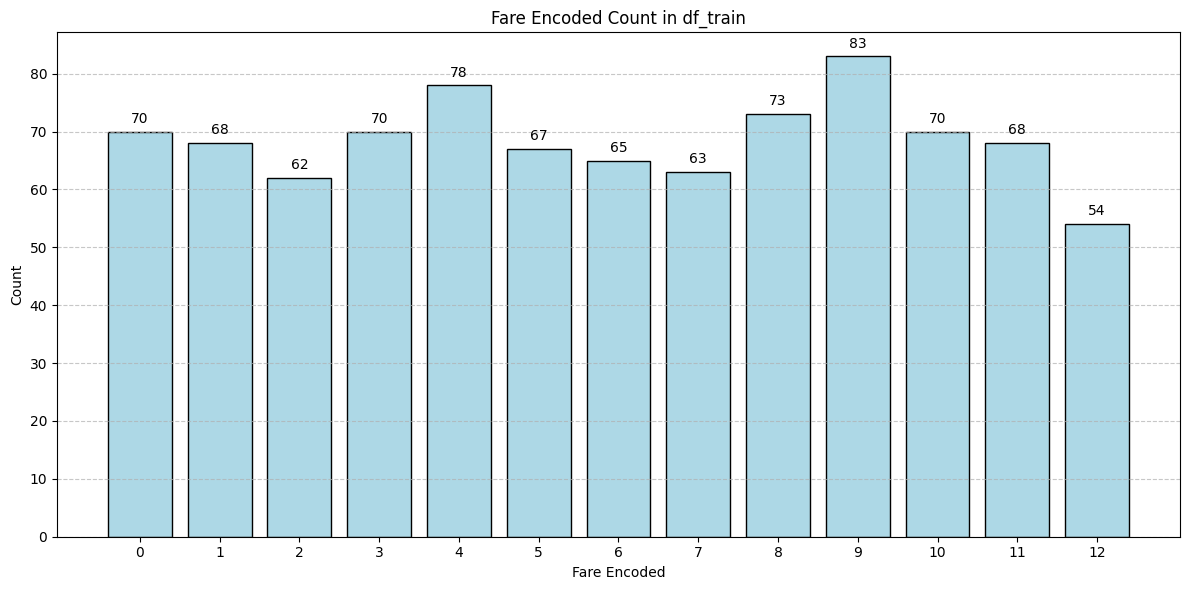

In [40]:
fare_encoded = df_train['Fare_encoded'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

bars = plt.bar(fare_encoded.index, fare_encoded.values, color='lightblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height +1,
        f'{height}',
        ha='center',
        va='bottom'
    )


plt.title('Fare Encoded Count in df_train')
plt.xlabel('Fare Encoded')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(fare_encoded.index)

plt.tight_layout()
plt.show()

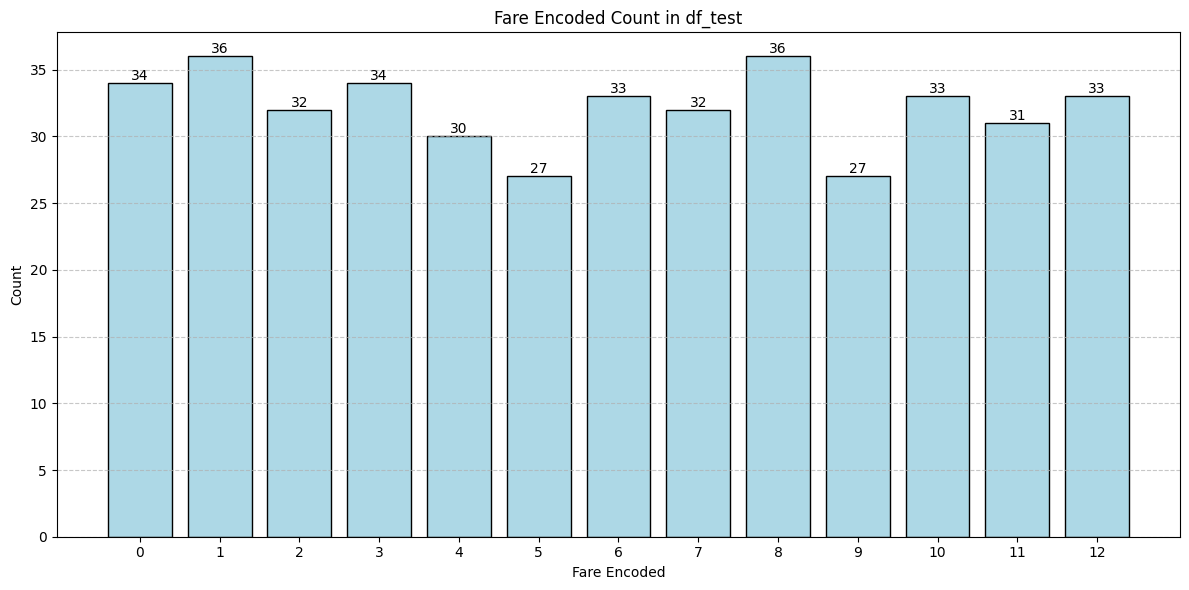

In [41]:
fare_encoded = df_test['Fare_encoded'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

bars = plt.bar(fare_encoded.index, fare_encoded.values, color='lightblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{height}',
        ha='center',
        va='bottom'
    )


plt.title('Fare Encoded Count in df_test')
plt.xlabel('Fare Encoded')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(fare_encoded.index)

plt.tight_layout()
plt.show()

### Correlation Matrix
#### A heatmap correlation is plotted to visualize the relationship between each numeric feature and the target variable.

"Certainly, the feature-engineered variable Survival_Rate has a strong correlation with Survived, as it is created from the training dataset using the ground truth and is highly specific to it. It also assumes some information from descriptive statistics of the test dataset, since the ground truth for the test data is not available. 

The codes below demonstrates the values contained in df_train['Survival_Rate'], compared to those added to df_test['Survival_Rate']. To address this and avoid overfitting, some noise is introduced into df_train['Survival_Rate'] to improve its generalization to the test data."

In [42]:
df_train['Survival_Rate'].value_counts()

Survival_Rate
0.00    485
1.00    298
0.50     60
0.25     25
0.75     23
Name: count, dtype: int64

In [43]:
df_test['Survival_Rate'].value_counts()

Survival_Rate
0.383838    203
1.000000     63
0.191919     53
0.000000     45
0.691919     31
0.500000     10
0.441919      6
0.250000      5
0.750000      2
Name: count, dtype: int64

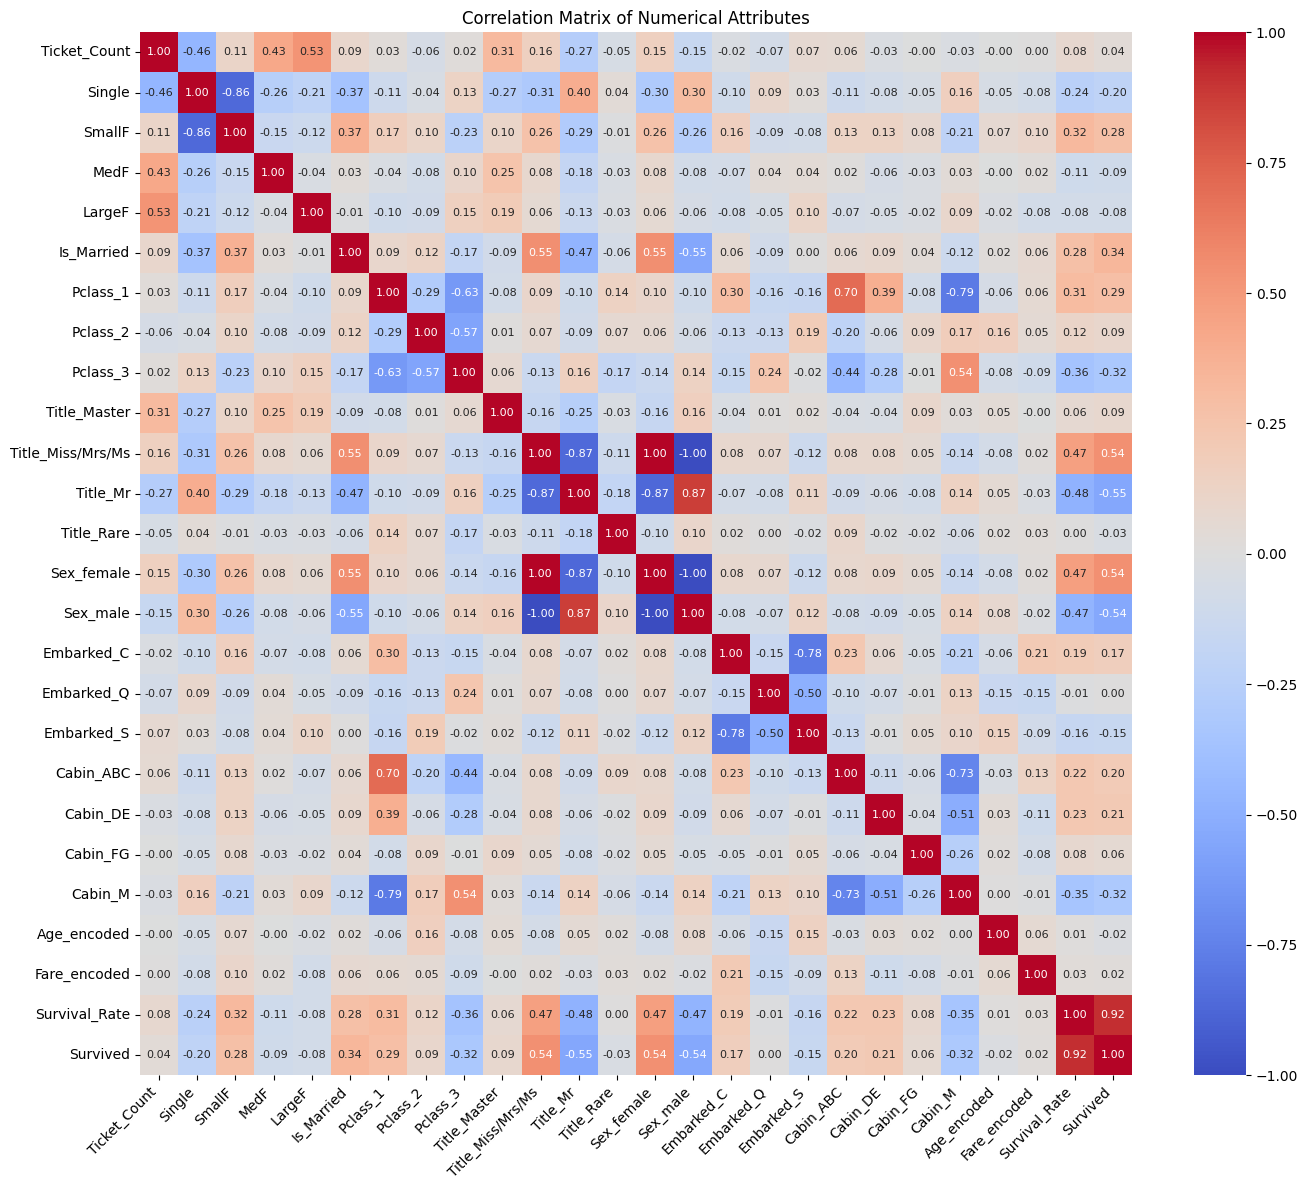

In [44]:
numerical_attributes = df_train[['Ticket_Count','Single','SmallF','MedF','LargeF','Is_Married', 'Pclass_1','Pclass_2','Pclass_3','Title_Master','Title_Miss/Mrs/Ms','Title_Mr','Title_Rare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Cabin_ABC','Cabin_DE','Cabin_FG','Cabin_M','Age_encoded','Fare_encoded','Survival_Rate', 'Survived']]
correlation_matrix = numerical_attributes.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Attributes')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Model Development

The machine learning model chosen for this dataset is an ensemble method using stacking. This approach combines XGBClassifier, LGBMClassifier, KNeighborsClassifier, and RandomForestClassifier as base models, with a LogisticRegression model serving as the meta-model.

The hyperparameters of the ensemble are tuned using Randomized Search CV to find nearly optimal settings.

In [45]:
# Adding noise to df_train['Survival_Rate'] and creating a feature named 'Survival_Rate_noisy'
def add_noise(df, column, noise_level=0.01):
    noise = np.random.normal(loc=0, scale=noise_level, size=df.shape[0])
    df[column + '_noisy'] = df[column] + noise

add_noise(df_train, 'Survival_Rate', noise_level=0.6)
add_noise(df_test, 'Survival_Rate', noise_level=0)

In [46]:
# Defining features to x_train, y_train, and x_test
x_train = df_train[['Ticket_Count','Single','SmallF','MedF','LargeF','Is_Married', 'Pclass_1','Pclass_2','Pclass_3','Title_Master','Title_Miss/Mrs/Ms','Title_Mr','Title_Rare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Cabin_ABC','Cabin_DE','Cabin_FG','Cabin_M','Age_encoded','Fare_encoded','Survival_Rate_noisy']]
y_train = df_train['Survived']
x_test = df_test[['Ticket_Count','Single','SmallF','MedF','LargeF','Is_Married', 'Pclass_1','Pclass_2','Pclass_3','Title_Master','Title_Miss/Mrs/Ms','Title_Mr','Title_Rare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Cabin_ABC','Cabin_DE','Cabin_FG','Cabin_M','Age_encoded','Fare_encoded','Survival_Rate_noisy']]

In [47]:
base_models = [
    ('xgb', xgb.XGBClassifier(eval_metric='mlogloss')),
    ('lgbm', lgb.LGBMClassifier(verbosity=-1)),
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier())
]

meta_model = LogisticRegression()

pipeline = Pipeline([
    ('stacking', StackingClassifier(estimators=base_models, final_estimator=meta_model))
])

param_distributions = {
    'stacking__xgb__n_estimators': randint(100, 300),
    'stacking__xgb__learning_rate': uniform(0.01, 0.2),
    'stacking__xgb__max_depth': randint(3, 10),
    'stacking__xgb__min_child_weight': randint(1, 10),
    'stacking__xgb__subsample': uniform(0.5, 0.5),
    'stacking__xgb__colsample_bytree': uniform(0.5, 0.5),

    'stacking__lgbm__n_estimators': randint(100, 300),
    'stacking__lgbm__learning_rate': uniform(0.01, 0.2),
    'stacking__lgbm__max_depth': randint(3, 20),
    'stacking__lgbm__min_child_samples': randint(5, 50),
    'stacking__lgbm__min_split_gain': uniform(0.0, 0.5),
    'stacking__lgbm__num_leaves': randint(20, 100),
    'stacking__lgbm__subsample': uniform(0.5, 0.5),
    'stacking__lgbm__colsample_bytree': uniform(0.5, 0.5),

    'stacking__knn__n_neighbors': randint(3, 15),
    'stacking__knn__weights': ['uniform', 'distance'],
    'stacking__knn__p': randint(1, 3),

    'stacking__rf__n_estimators': randint(100, 300),
    'stacking__rf__max_depth': randint(10, 50),
    'stacking__rf__min_samples_split': randint(2, 20),
    'stacking__rf__min_samples_leaf': randint(1, 20),
    'stacking__rf__bootstrap': [True, False],

    'stacking__final_estimator__C': uniform(0.5, 20),
    'stacking__final_estimator__penalty': ['l2'],
    'stacking__final_estimator__solver': ['liblinear', 'saga'],
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('stacking',
                                              StackingClassifier(estimators=[('xgb',
                                                                              XGBClassifier(base_score=None,
                                                                                            booster=None,
                                                                                            callbacks=None,
                                                                                            colsample_bylevel=None,
                                                                                            colsample_bynode=None,
                                                                                            colsample_bytree=None,
                                                                                            device=None,
                                                                                            early_stopping_rounds=None,
                                                                                            enable_categorical=False,
                                                                                            eval_metric='mlogloss',
                                                                                            feature_types=None,
                                                                                            gamma=None,
                                                                                            grow_pol...
                                        'stacking__xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002943D5F41D0>,
                                        'stacking__xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002943D38DB10>,
                                        'stacking__xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002943D37FF90>},
                   scoring='accuracy', verbose=2)

In [48]:
# Retrieving the best parameters identified from the fit
print("Best parameters found:")
print(random_search.best_params_)

Best parameters found:
{'stacking__final_estimator__C': 2.0768412645278596, 'stacking__final_estimator__penalty': 'l2', 'stacking__final_estimator__solver': 'liblinear', 'stacking__knn__n_neighbors': 13, 'stacking__knn__p': 1, 'stacking__knn__weights': 'distance', 'stacking__lgbm__colsample_bytree': 0.5338415430882555, 'stacking__lgbm__learning_rate': 0.09604158462626752, 'stacking__lgbm__max_depth': 3, 'stacking__lgbm__min_child_samples': 28, 'stacking__lgbm__min_split_gain': 0.3974830308057429, 'stacking__lgbm__n_estimators': 213, 'stacking__lgbm__num_leaves': 86, 'stacking__lgbm__subsample': 0.9512049281430066, 'stacking__rf__bootstrap': False, 'stacking__rf__max_depth': 16, 'stacking__rf__min_samples_leaf': 7, 'stacking__rf__min_samples_split': 19, 'stacking__rf__n_estimators': 183, 'stacking__xgb__colsample_bytree': 0.9322058937921742, 'stacking__xgb__learning_rate': 0.06699020171830969, 'stacking__xgb__max_depth': 4, 'stacking__xgb__min_child_weight': 1, 'stacking__xgb__n_estimat

# Model Evaluation

Based on this ML model, the chosen method for validation was the accuracy score. The model's performance is validated through the mean score obtained during training with cross-validation folds.

The validation performance obtained through Randomized Search typically falls within the range of **0.86** to **0.90.**

The maximum score on Kaggle obtained with this model was **0.80622**, with the **'noise_level' set to '0.6'**.

**It's important to note that the value in 'Survival_Rate_noisy' may vary with each execution of the code, even with the same noise level set. This variation can affect the output of the ML model, as the values in this feature change.**

To select a good fit and avoid overfitting while achieving a strong Kaggle submission score, I analyzed the correlation between 'Survival_Rate_noisy' and 'Survived'. The correlation was **0.557306** when I submitted the .csv file with the score mentioned above.

In [49]:
print("Best validation performance:")
print(random_search.best_score_)

Best validation performance:
0.8799070993660159


In [50]:
# Calculating the correlation between 'Survival_Rate_noisy' and 'Survived'
correlation = df_train['Survival_Rate_noisy'].corr(df_train['Survived'])
print(correlation)

0.5681746583940597


# Submission

Submiting the .csv file to Kaggle.

In [51]:
# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(x_test)

# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

### Personal Information
* #### LinkedIn: www.linkedin.com/in/viniciuscordeiro-vi/
* #### GitHub: https://github.com/Vini-Cordeiro